# Lab 9 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Modelos Generativos

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Análise de sarcamos e sentimento com Modelos Sequenciais.

Data da entrega : 21/10 

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-Lab7b.pdf"
- Envie o PDF via google [FORM](https://forms.gle/9VCKDGu5cqoNcYVK8)

Este notebook é baseado em tensorflow e Keras.

# Parte I - Análise de sarcamo com um base de dados em inglês (kaggle) (40pt)




**ToDO**: Veja o exemplo apresentado durante a aula, sobre detecção de [sarcasmo em textos inglês](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection). Execute o notebook do [link](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb). Modifique o modelo para um modelo sequencial (redes recorrentes ou um Transformer) e re-faça os testes. Com qual arquitetura você conseguiu melhorar os resultados? Tente explicar o por que.


In [31]:
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2022-09-29 23:34:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2022-09-29 23:34:48 (225 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [21]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [22]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [23]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#Modelos

Modelo 1

In [26]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 30
history1 = model1.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6732 - accuracy: 0.5660 - val_loss: 0.6253 - val_accuracy: 0.6198 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 1s - loss: 0.4963 - accuracy: 0.7965 - val_loss: 0.4252 - val_accuracy: 0.8100 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3437 - accuracy: 0.8659 - val_loss: 0.3671 - val_accuracy: 0.8459 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.2859 - accuracy: 0.8906 - val_loss: 0.3488 - val_accuracy: 0.8539 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.2481 - accuracy: 0.9046 - val_loss: 0.3529 - val_accuracy: 0.8498 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 1s - loss: 0.2193 - accuracy: 0.9166 - val_loss: 0.3466 - val_accuracy: 0.8518 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1968 - accuracy: 0.9259 - val_loss: 0.3492 - val_accuracy: 0.8556 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.1770 - accuracy: 0.9334 - val_loss: 0.3585 - val_accuracy: 0.8538 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

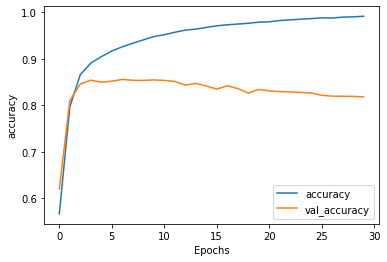

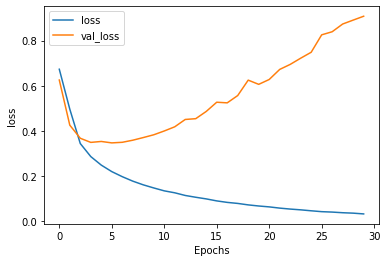

In [27]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

Modelo 2

In [35]:
training_padded.shape

(20000, 100)

In [48]:
model2 = Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(24)))
model2.add(tf.keras.layers.Dense(8, activation='relu')),
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history2 = model2.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 20s - loss: 0.4197 - accuracy: 0.8006 - val_loss: 0.3354 - val_accuracy: 0.8533 - 20s/epoch - 31ms/step
Epoch 2/10
625/625 - 15s - loss: 0.2239 - accuracy: 0.9084 - val_loss: 0.3432 - val_accuracy: 0.8556 - 15s/epoch - 24ms/step
Epoch 3/10
625/625 - 15s - loss: 0.1445 - accuracy: 0.9456 - val_loss: 0.3853 - val_accuracy: 0.8509 - 15s/epoch - 25ms/step
Epoch 4/10
625/625 - 16s - loss: 0.0911 - accuracy: 0.9682 - val_loss: 0.4608 - val_accuracy: 0.8477 - 16s/epoch - 26ms/step
Epoch 5/10
625/625 - 16s - loss: 0.0598 - accuracy: 0.9804 - val_loss: 0.5818 - val_accuracy: 0.8405 - 16s/epoch - 26ms/step
Epoch 6/10
625/625 - 15s - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.7171 - val_accuracy: 0.8360 - 15s/epoch - 24ms/step
Epoch 7/10
625/625 - 15s - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.7333 - val_accuracy: 0.8387 - 15s/epoch - 24ms/step
Epoch 8/10
625/625 - 16s - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.7960 - val_accuracy: 0.8329 - 16s/epoch - 25ms/step


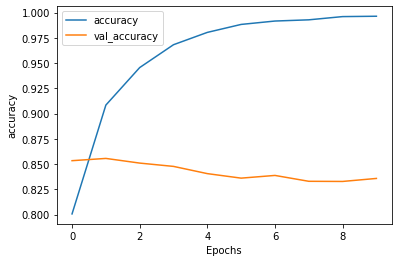

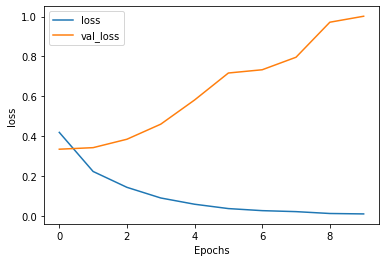

In [49]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

Modelo 3

In [53]:
model3 = Sequential()
model3.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history3 = model3.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 16s - loss: 0.4850 - accuracy: 0.7709 - val_loss: 0.3643 - val_accuracy: 0.8459 - 16s/epoch - 26ms/step
Epoch 2/10
625/625 - 13s - loss: 0.2617 - accuracy: 0.8988 - val_loss: 0.3450 - val_accuracy: 0.8532 - 13s/epoch - 21ms/step
Epoch 3/10
625/625 - 13s - loss: 0.1808 - accuracy: 0.9361 - val_loss: 0.3671 - val_accuracy: 0.8460 - 13s/epoch - 20ms/step
Epoch 4/10
625/625 - 13s - loss: 0.1345 - accuracy: 0.9556 - val_loss: 0.4138 - val_accuracy: 0.8451 - 13s/epoch - 20ms/step
Epoch 5/10
625/625 - 13s - loss: 0.1042 - accuracy: 0.9689 - val_loss: 0.4721 - val_accuracy: 0.8396 - 13s/epoch - 21ms/step
Epoch 6/10
625/625 - 13s - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.4951 - val_accuracy: 0.8392 - 13s/epoch - 20ms/step
Epoch 7/10
625/625 - 12s - loss: 0.0603 - accuracy: 0.9833 - val_loss: 0.5426 - val_accuracy: 0.8390 - 12s/epoch - 20ms/step
Epoch 8/10
625/625 - 12s - loss: 0.0441 - accuracy: 0.9892 - val_loss: 0.5953 - val_accuracy: 0.8354 - 12s/epoch - 20ms/step


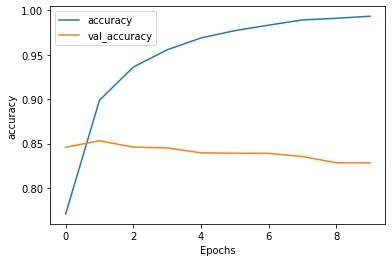

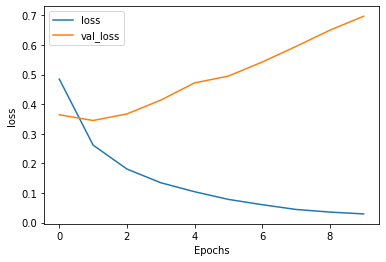

In [54]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

O Modelo 2 com uma Rede Neural Recorrente Bidirecional(GRU) teve uma melhor acurácia tanto no treino e na validação, e melhor do que a rede neural comum, pois a Rede Recorrente implementada considera a ordem das palavras, e tem uma certa memória, o que é de suma importância na avaliação de um texto.

# Parte II - Análise de sentimento de um base em português (60pt)


A seguir, faremos um teste semelhante com dados em português. Os dados abaixo foram retirados do Twitter, em 2017. As contas monitoradas estavam comentando sobre o governo de Minas Gerais, e foi levantado o sentimento com relação ao governo.

## Carregando os pacotes

In [58]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn import metrics
from sklearn.model_selection import train_test_split
from string import punctuation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Carregando a base (arquivo CSV - Tweets_minas_2017.dat)

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
URL = '/content/drive/MyDrive/Tweets_minas_2017.dat'
dataframe = pd.read_csv(URL, encoding='utf-8')
dataframe.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pré-processamento dos dados

In [65]:
# configura/renomeia o dataframe para campos que façam mais sentido
np.random.seed(42)
raw_df = (dataframe.rename(columns={"Created At": "publication_date",
                                "Text": "tweet",                                
                                "Retweet Count" : "num_retweets",
                                "Username": "username",
                                "Classificacao": "sentiment"})
               .loc[:, ["publication_date", "tweet", "num_retweets",  "username", "sentiment"]])
raw_df["publication_date"] = pd.to_datetime(raw_df["publication_date"],infer_datetime_format=True)
raw_df["sentiment"] = raw_df["sentiment"].replace({"Negativo": 0, "Neutro": np.random.choice([0, 1]), "Positivo": 1})

raw_df.head()

,publication_date,tweet,num_retweets,username,sentiment
0,2017-01-08 01:22:05+00:00,���⛪ @ Catedral de Santo Antônio - Governador ...,0,Leonardo C Schneider,0
1,2017-01-08 01:49:01+00:00,"� @ Governador Valadares, Minas Gerais https:/...",0,Wândell,0
2,2017-01-08 01:01:46+00:00,"�� @ Governador Valadares, Minas Gerais https:...",0,Wândell,0
3,2017-01-04 21:43:51+00:00,��� https://t.co/BnDsO34qK0,0,Ana estudando,0
4,2017-01-09 15:08:21+00:00,��� PSOL vai questionar aumento de vereadores ...,0,Emily,0


In [66]:
# veja a quantidade de exemplos positivos e negativos
neg, pos = np.bincount(raw_df['sentiment'])
total = neg + pos
print('Exemplos:\n    Total: {} \n    Negativos: {} ({:.2f}% do total)\n    Positivos: {} ({:.2f}% do total)\n'.format(
    total, neg, 100*neg/total, pos, 100 * pos / total))

Exemplos:
    Total: 8199 
    Negativos: 4899 (59.75% do total)
    Positivos: 3300 (40.25% do total)



Pode-se limpar o texto, excluindo-se caracteres estranhos ou infrequentes. Por exemplo, veja a função clean_text.


In [67]:
# limpa o texto
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## coloca tudo em caixa baixa
    text = text.lower().split()
    
    text = " ".join(text)
    ## limpa/altera 
    text = re.sub(r"pra", "para", text)
    text = re.sub(r"eh", "e", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"http://", "", text)
    text = re.sub(r"https://", "", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    ## 
    text = text.split()
    
    return text

Padronizar o texto ajuda o modelo de aprendizagem de máquina. Aplique a função de limpeza nos dados.

In [68]:
# Aplica a função acima e limpa o texto
raw_df['tweet'] = raw_df['tweet'].map(lambda x: clean_text(x))

In [69]:
#  a data da publicação não parece interessante para o nosso contexto. Vamos descarta-la, junto com mais algumas colunas (retweets, username).
cleaned_df = raw_df.copy()

# descara data da publicação, numero de retweets e username
cleaned_df.pop('publication_date')
cleaned_df.pop('num_retweets')
cleaned_df.pop('username')

cleaned_df.head()

,tweet,sentiment
0,"[���⛪, @, catedral, de, santo, antônio, -, gov...",0
1,"[�, @, governador, valadares, minas, gerais, h...",0
2,"[��, @, governador, valadares, minas, gerais, ...",0
3,"[���, https, :, t, co, bndso34qk0]",0
4,"[���, psol, vai, questionar, aumento, de, vere...",0


In [70]:
dataframe = cleaned_df.copy()
labels = dataframe.pop('sentiment')
data = dataframe.pop('tweet')

Use o objeto Tokenizer para separar o texto em vários tokens. Uma instância de dados deve ter um tamanho máximo para modelos de redes neurais. Consideraremos, aqui, que um tweet terá 30 tokens, no máximo. Tweets menores serão completados com zero (zero padding, pad_sequences). Veja que o objeto Tokenizer também oferece uma forma de se filtrar caracteres não desejados.

In [71]:
tk = Tokenizer(lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tk.fit_on_texts(data)
word_index = tk.word_index
print(len(word_index))
print(word_index)

max_len = 30 # tamanho maximo para um twitte
train_tokenized = tk.texts_to_sequences(data)
X = np.array(pad_sequences(train_tokenized, maxlen=max_len))

y = np.array(labels)

print(X[0])

13807
{':': 1, 'de': 2, 'https': 3, 't': 4, 'co': 5, 'em': 6, 'minas': 7, 'rt': 8, '-': 9, 'estado': 10, 'mg': 11, 'e': 12, 'a': 13, 'governo': 14, 'o': 15, '+': 16, 'do': 17, 'helicópteros': 18, 'é': 19, 'que': 20, 'gerais': 21, 'mais': 22, 'calamidade': 23, '!': 24, 'dois': 25, 'drogas': 26, 'com': 27, 'financeira': 28, 'compara': 29, 'para': 30, 'não': 31, 'são': 32, 'governador': 33, 'q': 34, 'da': 35, 'pimentel': 36, 'no': 37, 'presídio': 38, 'por': 39, 'febre': 40, 'na': 41, 'amarela': 42, 'tem': 43, 'r$': 44, '2': 45, 'roubo': 46, 'ainda': 47, 'mesmo': 48, 'tráfico': 49, 'dos': 50, 'contra': 51, 'presos': 52, 'preso': 53, 'polícia': 54, 'só': 55, 'via': 56, 'cara': 57, 'três': 58, 'pau': 59, 'anos': 60, '@pmmg190': 61, 'justiça': 62, 'recursos': 63, 'conta': 64, 'ñ': 65, 'htt…': 66, 'canalhice': 67, 'maiores': 68, 'avisa': 69, '8': 70, 'bb': 71, '@anapaulavolei': 72, 'vive': 73, 'após': 74, 'pm': 75, 'valadares': 76, 'fernando': 77, 'milhões': 78, 'juiz': 79, 'privado': 80, 'tev

In [72]:
print(X.shape)

(8199, 30)


Observe que cada token recebe um valor único. O comando abaixo imprime a instância X[100].



In [73]:
print(X[100])

[   0    0    0    0    0    0    0    0    0 4809 1645  270 4810   35
 4811   41 2131 4812   35 2557 4813  253 4814    1   99    3    1    4
    5 4815]


In [74]:
# divide em 80% treino e 20% validação.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2)
print(len(train_X), 'exemplos de treino')
print(len(val_X), 'exemplos de validação')
print(len(test_X), 'exemplos de test')

5247 exemplos de treino
1312 exemplos de validação
1640 exemplos de test


##ToDo:  Construa uma rede recorrente para fazer uma análise de sentimentos. (40pt)

In [87]:
len(word_index)

13807

In [83]:
X.max()

13807

In [108]:
# Se necessário, mude o shape de train_X e val_X

# Monta o modelo sequencial
embed_dim = 60 # fique a vontade para escolher a quantidade de dimensões da camada de embeddings
max_fatures = X.max() + 1 # número máximo de palavras da base de treino + uma

model = tf.keras.Sequential([tf.keras.layers.Embedding(max_fatures, embedding_dim, input_length=30),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(24)),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])# ToDo ...


# compila  
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # Todo : qual funcao de custo usar? Como métrica, use acurácia...


# imprime o modelo
print(model.summary())


# treina

n_epochs = 10 # escolha o numero de epocas

model.fit(train_X, train_y, epochs=n_epochs, validation_data=(val_X,val_y))

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 30, 16)            220928    
                                                                 
 bidirectional_29 (Bidirecti  (None, 48)               6048      
 onal)                                                           
                                                                 
 dense_102 (Dense)           (None, 8)                 392       
                                                                 
 dense_103 (Dense)           (None, 1)                 9         
                                                                 
Total params: 227,377
Trainable params: 227,377
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
164/164 [==============================] - 5s 18ms/step - loss: 0.4202 - accuracy: 0.7999 - val_l

## ToDo: Avaliação do modelo (10pt)

**ToDo:** Faça uma avaliação dos resultados encontrados. Você pode usar métricas como precisão, revocação, F1-score, acurácia, etc.

```
    Valores próximos de 0 => sentimento Negativo
    Valores próximos de 1 => sentimento Positivo
```

In [109]:
#Importações
from sklearn.metrics import classification_report

In [110]:
test_X.shape

(1640, 30)

In [118]:
y_pred.shape

(1640, 1)

In [126]:
# ToDo: Seu codigo aqui
#Obter Resultados
y_pred = model.predict(test_X, verbose=1)

y_pred_bool = [0 if x < 0.5 else 1 for x in list(y_pred)]
print(classification_report(test_y.reshape(-1), y_pred_bool))

52/52 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.98      0.98      0.98       662

    accuracy                           0.98      1640
   macro avg       0.98      0.98      0.98      1640
weighted avg       0.98      0.98      0.98      1640



O Modelo teve 98% de acurácia e acertou bem nas duas classes 99% na classe 0(comentário ruim) e 98% na classe 1(comentário positivo)


**ToDo:** Quais conclusões você chegou?

Que Modelo acerta muito bem se um comentário é positivo ou negativo, e além disso pode-se concluir que as Redes Neurais Recorrentes são excelentes para trabalhar com textos.

## ToDo: Testando as frases (10pt)

In [127]:
# função para avaliar um tweet
def sample_predict(sentence):
  max_len = 30 # numero maximo de palavras em um tweet
  tk_sentence = tk.texts_to_sequences(sentence)
  print(tk_sentence)
  encoded_sample_pred_text = np.array(pad_sequences(tk_sentence, maxlen=max_len))
  predictions = model.predict(encoded_sample_pred_text)
  return (predictions)

Teste as frases abaixo e verifique se o seu modelo é coerente.

In [128]:
sample_pred_text = {'pimentel governa bem, faz um bom trabalho.'}
predictions = sample_predict(sample_pred_text)
print (predictions)

[[36, 3439, 1001, 226, 90, 261, 426]]
[[0.5099271]]


Comentário acima é positivo

In [129]:
sample_pred_text = {'O governo de minas esta ruim. o governador anda roubando, o povo quer coisas melhores. fora governo.'}
predictions = sample_predict(sample_pred_text)
print (predictions)

[[15, 14, 2, 7, 326, 1285, 15, 33, 2920, 15, 407, 179, 5451, 84, 14]]
[[3.4901845e-05]]


O comentário acima é negativo.

In [130]:
sample_pred_text = {'governo fez melhorias na saúde e educação. É um ótimo governo. adoro pimentel.'}
predictions = sample_predict(sample_pred_text)
print (predictions)

[[14, 1113, 41, 198, 12, 142, 19, 90, 3004, 14, 8443, 36]]
[[0.9971152]]


O comentário acima é positivo

In [131]:
sample_pred_text = {'governo de m**da, só sabe roubar!!'}
predictions = sample_predict(sample_pred_text)
print (predictions)

[[14, 2, 106, 35, 55, 1676, 4130]]
[[0.00020024]]


O comentário acima é negativo

**ToDo:** O que você pode dizer sobre as predições?

Que o meu Modelo está acertando corretamente todas as predições.